In [2]:
# Necesssary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,median_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
df = pd.read_csv('cleaned_feature_selection.csv')

In [4]:
df

,price,area_type,availability,location,society,total_sqft,bath,balcony,house_size,house_type
0,39.07,0.0,0,47.021069,87.021588,1056.0,2,1,2,0
1,120.00,2.0,1,101.197336,101.586015,2600.0,5,3,4,1
2,62.00,1.0,1,61.665593,100.947229,1440.0,2,3,3,0
3,95.00,0.0,1,106.447230,106.783214,1521.0,3,1,3,0
4,51.00,0.0,1,87.743633,100.947229,1200.0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...
12107,47.00,0.0,1,88.283535,100.947229,1262.0,2,2,2,0
12108,112.00,0.0,1,114.973765,97.345048,1715.0,3,3,3,0
12109,231.00,1.0,1,99.353450,111.355328,3453.0,4,0,5,1
12110,400.00,0.0,1,119.488647,100.947229,3600.0,5,0,4,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12112 entries, 0 to 12111
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         12112 non-null  float64
 1   area_type     12112 non-null  float64
 2   availability  12112 non-null  int64  
 3   location      12112 non-null  float64
 4   society       12112 non-null  float64
 5   total_sqft    12112 non-null  float64
 6   bath          12112 non-null  int64  
 7   balcony       12112 non-null  int64  
 8   house_size    12112 non-null  int64  
 9   house_type    12112 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 946.4 KB


In [6]:
# As The Price column data is still skewed. Performing log transformation

df['price'] = np.log(df['price'])

Text(0, 0.5, 'Frequency')

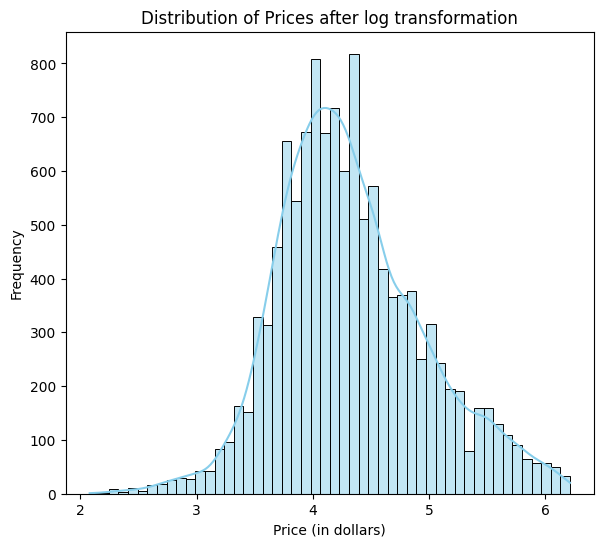

In [7]:
plt.figure(figsize=(15, 6))

# Distribution plot with log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices after log transformation')
plt.xlabel('Price (in dollars)')
plt.ylabel('Frequency')


In [8]:
X = df.drop('price',axis= 1)
y= df['price']

In [9]:
df

,price,area_type,availability,location,society,total_sqft,bath,balcony,house_size,house_type
0,3.665355,0.0,0,47.021069,87.021588,1056.0,2,1,2,0
1,4.787492,2.0,1,101.197336,101.586015,2600.0,5,3,4,1
2,4.127134,1.0,1,61.665593,100.947229,1440.0,2,3,3,0
3,4.553877,0.0,1,106.447230,106.783214,1521.0,3,1,3,0
4,3.931826,0.0,1,87.743633,100.947229,1200.0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...
12107,3.850148,0.0,1,88.283535,100.947229,1262.0,2,2,2,0
12108,4.718499,0.0,1,114.973765,97.345048,1715.0,3,3,3,0
12109,5.442418,1.0,1,99.353450,111.355328,3453.0,4,0,5,1
12110,5.991465,0.0,1,119.488647,100.947229,3600.0,5,0,4,0


In [10]:
print(X.shape)
print(y.size)

(12112, 9)
12112


In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize X_train & X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Checking performance of different models

In [13]:
# Initialize regression models
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("XGBoost", XGBRegressor()),
    ('extra trees', ExtraTreesRegressor()),
    ('mlp', MLPRegressor()),
    ('svr',SVR()),
    
]

In [14]:
output = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])

# Define number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds)

# Evaluate models
for name, model in models:
    mae_scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=kf)
    mse_scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=kf)
    
    # Convert negative scores to positive
    mae = -mae_scores.mean()
    mse = -mse_scores.mean()
    
    # Calculate RMSE and R2 from MAE and MSE
    rmse = np.sqrt(mse)
    r2 = 1 - (mse / np.var(y_test))
    
    # Append evaluation metrics to the DataFrame
    output = output.append({'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}, ignore_index=True)

# Sort the DataFrame by R2 score in descending order
output = output.sort_values(by='R2', ascending=False)

In [15]:
output 

,Model,MAE,MSE,RMSE,R2
7,XGBoost,0.159580,0.054402,0.233243,0.869904
4,Random Forest,0.158867,0.056254,0.237178,0.865476
8,extra trees,0.165275,0.060905,0.246790,0.854352
5,Gradient Boosting,0.188375,0.066066,0.257033,0.842011
10,svr,0.203624,0.075404,0.274598,0.819680
9,mlp,0.206700,0.077236,0.277914,0.815299
3,Decision Tree,0.204721,0.100343,0.316769,0.760043
1,Ridge Regression,0.247817,0.106219,0.325913,0.745990
0,Linear Regression,0.247816,0.106219,0.325913,0.745990
6,AdaBoost,0.287254,0.133035,0.364739,0.681864


Random Forest & XGBoost are providing the best results

# Hyperparameter Tuning

### Random Forest

In [16]:
param_grid_rf = {
    'regressor_rf__n_estimators': [100, 150, 200, 250], 
    'regressor_rf__max_depth': [None, 20, 30, 40], 
    'regressor_rf__max_samples': [ 0.3, 0.5, 0.7, 1.0], 
    'regressor_rf__max_features': ['auto', 'sqrt', 0.5, 0.8],
    'regressor_rf__min_samples_leaf': [1, 2, 3, 4], 
    'regressor_rf__min_samples_split': [2, 5, 10]  
}

In [17]:
# Create pipeline
pipeline_rf = Pipeline([('regressor_rf', RandomForestRegressor())])

In [18]:
# Define KFold for cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [19]:
# Perform GridSearchCV for RandomForestRegressor
search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=kfold, scoring='r2', n_jobs=-1, verbose=4)

In [ ]:
search_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 3072 candidates, totalling 30720 fits


In [27]:
print("Best parameters : ", search_rf.best_params_)

Best parameters :  {'regressor_rf__max_depth': 40, 'regressor_rf__max_features': 0.5, 'regressor_rf__max_samples': 1.0, 'regressor_rf__min_samples_leaf': 1, 'regressor_rf__min_samples_split': 5, 'regressor_rf__n_estimators': 250}


In [31]:
print("Best score : ",search_rf.best_score_)

Best score :  0.8680181430814435


### XGB

In [64]:
param_grid_xgb = {
    'regressor_xgb__n_estimators': [200, 300, 400],  
    'regressor_xgb__max_depth': [3, 5, 7],  
    'regressor_xgb__learning_rate': [0.01, 0.1]
}

In [65]:
pipeline_xgb = Pipeline([('regressor_xgb', XGBRegressor())])

In [66]:
# Perform GridSearchCV for XGBRegressor
search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=kfold, scoring='r2', n_jobs=-1, verbose=4)

In [67]:
search_xgb.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('regressor_xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_pol...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor_xgb__learning_rate': [0.01, 0.1],
                         'regressor_xgb__max_depth': [3, 5, 7],
                         'regressor_xgb__n_estimators': [200, 300, 400]},
             scoring='r2', verbose=4)

In [46]:
print("Best parameters : ", search_xgb.best_params_)

Best parameters :  {'regressor_xgb__learning_rate': 0.1, 'regressor_xgb__max_depth': None, 'regressor_xgb__n_estimators': 300}


In [68]:
print("Best score : ",search_xgb.best_score_)

Best score :  0.8726874987876524


In [69]:
# Make predictions on X_test
predictions = search_xgb.predict(X_test_scaled)

# Evaluate the predictions with various metrics
print("R-squared:", r2_score(y_test, predictions))
print("Mean squared error:", mean_squared_error(y_test, predictions))
print("Mean absolute error:", mean_absolute_error(y_test, predictions))
print("Median absolute error:", median_absolute_error(y_test, predictions))

R-squared: 0.8760889681515767
Mean squared error: 0.05181578299791032
Mean absolute error: 0.15605938379387035
Median absolute error: 0.1032371106009009


# Conclusion
Both are performing good.
- using **Random forest** for final model

In [73]:
final_model = RandomForestRegressor(max_depth=40, max_features=0.5, max_samples=1.0, 
                                       min_samples_leaf=1, min_samples_split=5, n_estimators=250)
final_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=40, max_features=0.5, max_samples=1.0,
                      min_samples_split=5, n_estimators=250)

In [98]:
feature_importance = final_model.feature_importances_

sorted_indices = np.argsort(feature_importance) 
feature_importance = feature_importance[sorted_indices]

feature_importance

array([0.00761898, 0.01374074, 0.01613285, 0.02183717, 0.10036835,
       0.1103393 , 0.15587212, 0.16828979, 0.4058007 ])

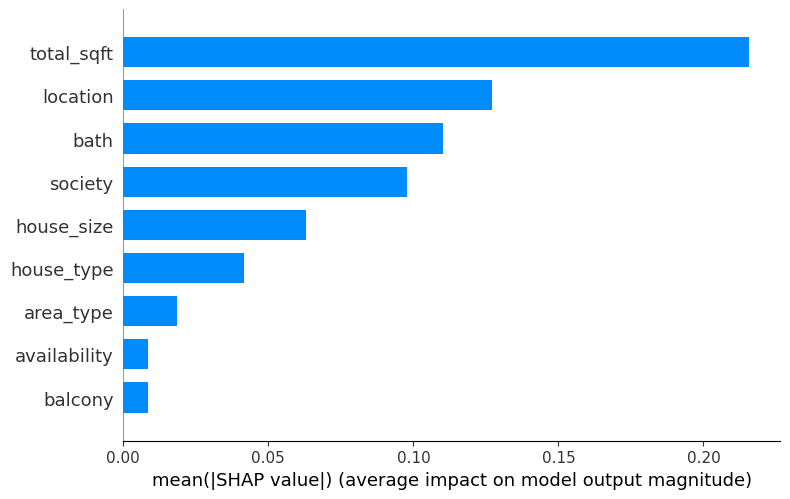

In [87]:
# Feature importances
import shap

# Explain model predictions using SHAP
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, plot_type='bar')

# Display SHAP summary plot
plt.show()

In [100]:
# Make predictions 
predictions = final_model.predict(X_test_scaled)

# Evaluate the predictions with various metrics
print("R-squared:", r2_score(y_test, predictions))
print("Mean squared error:", mean_squared_error(y_test, predictions))
print("Mean absolute error:", mean_absolute_error(y_test, predictions))
print("Median absolute error:", median_absolute_error(y_test, predictions))

R-squared: 0.8773448543179614
Mean squared error: 0.051290610024231346
Mean absolute error: 0.15447772821854483
Median absolute error: 0.1050246145705529


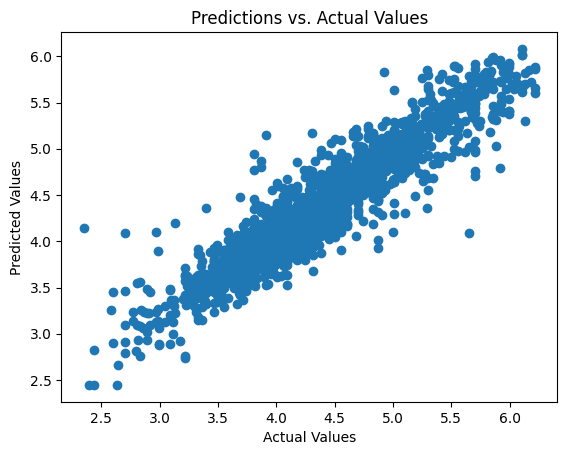

In [101]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. Actual Values")
plt.show()

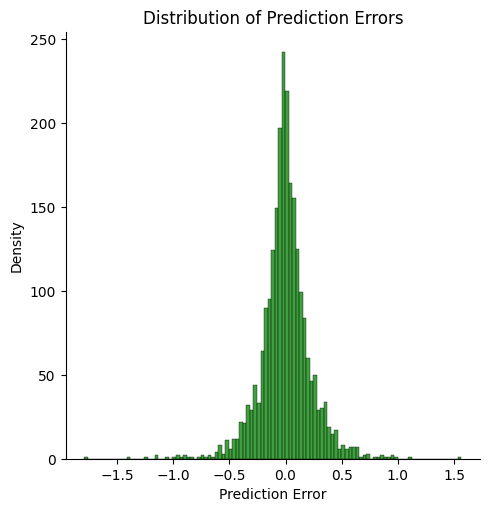

In [102]:
sns.displot(y_test - predictions, color='green')
plt.xlabel("Prediction Error")
plt.ylabel("Density")
plt.title("Distribution of Prediction Errors")
plt.show()

## Exporting the model

In [104]:
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)